In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import datetime
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.set(style='darkgrid', font_scale=1.4)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 1. Getting Data

In [2]:
train = pd.read_csv('../input/spaceship-titanic/train.csv')
test = pd.read_csv('../input/spaceship-titanic/test.csv')

train_test = pd.concat([train, test])

train_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# 2. Challenge Description
> PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
> 
> HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
> 
> CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
> Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
> Destination - The planet the passenger will be debarking to.
> Age - The age of the passenger.
> VIP - Whether the passenger has paid for special VIP service during the voyage.</font>
> RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
> Name - The first and last names of the passenger.

> **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

# 3. Check Missing Values

In [3]:
print(train_test.isna().sum())

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64


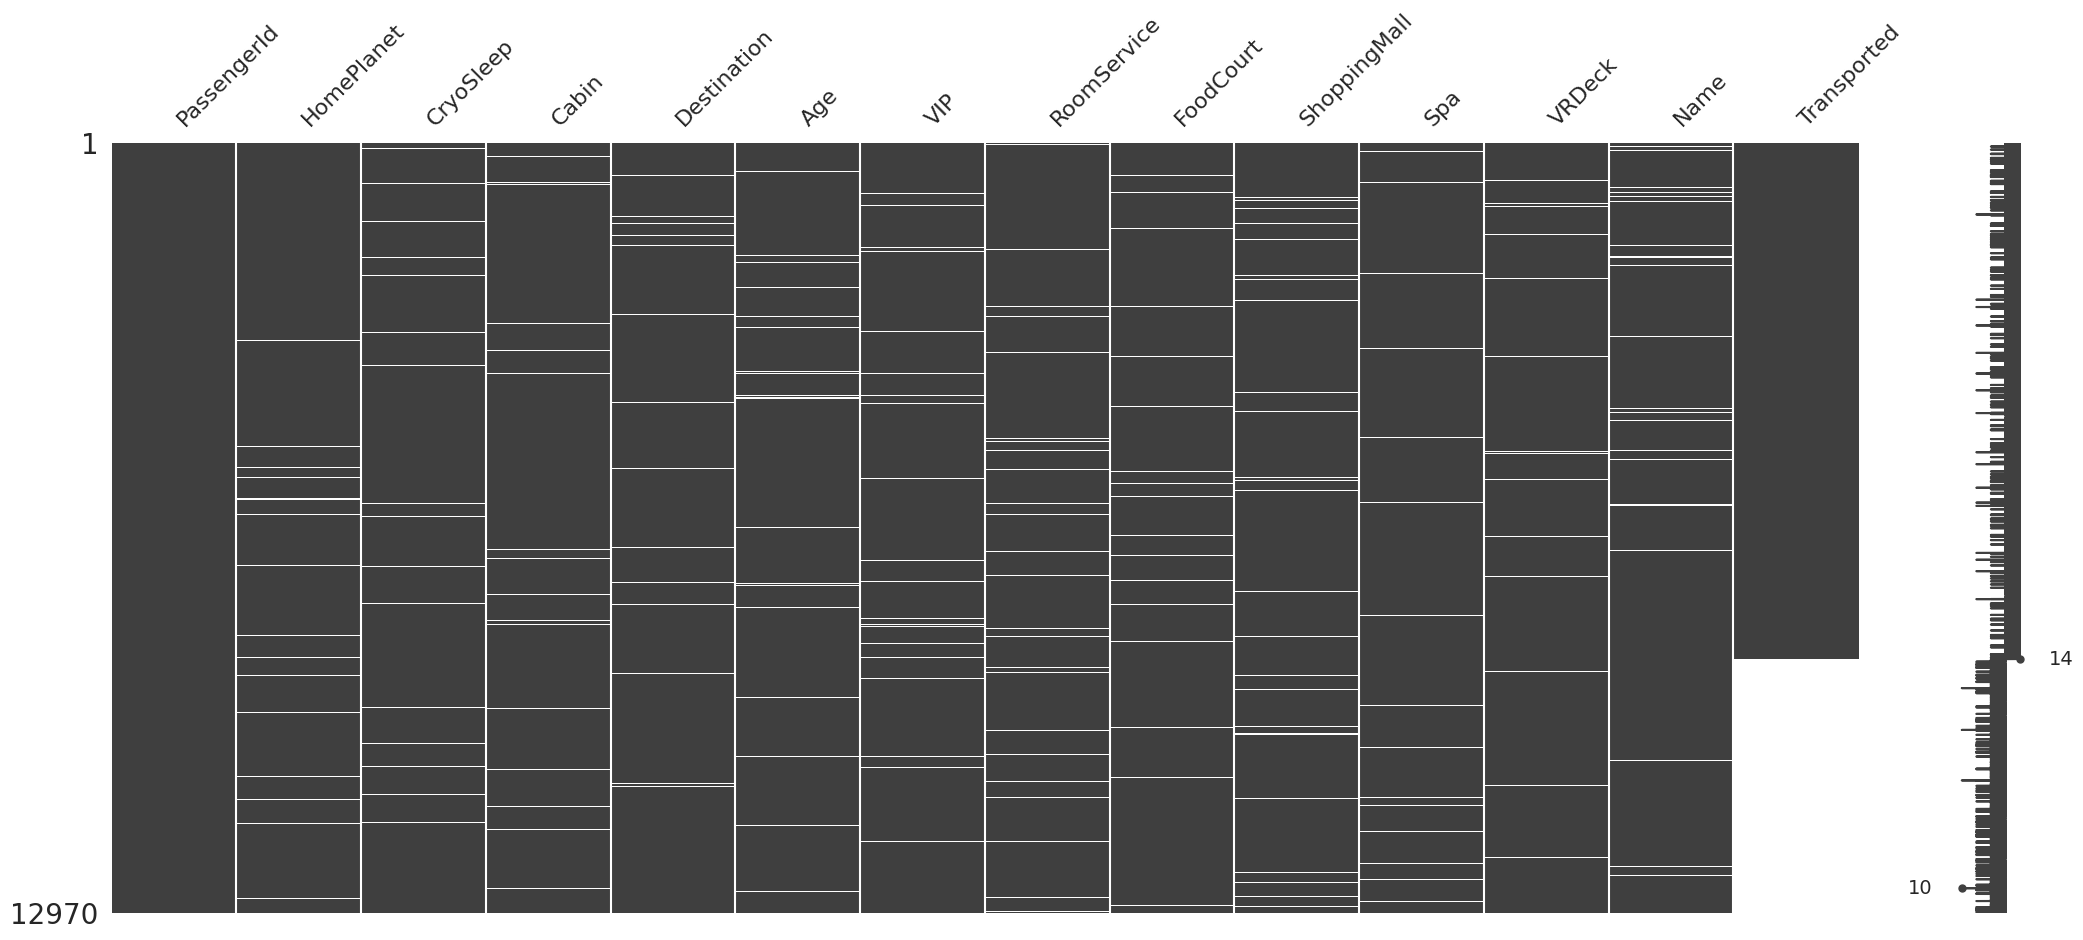

In [4]:
msno.matrix(train_test)
plt.show()

# 3. Testing & Handling Missing Values¶

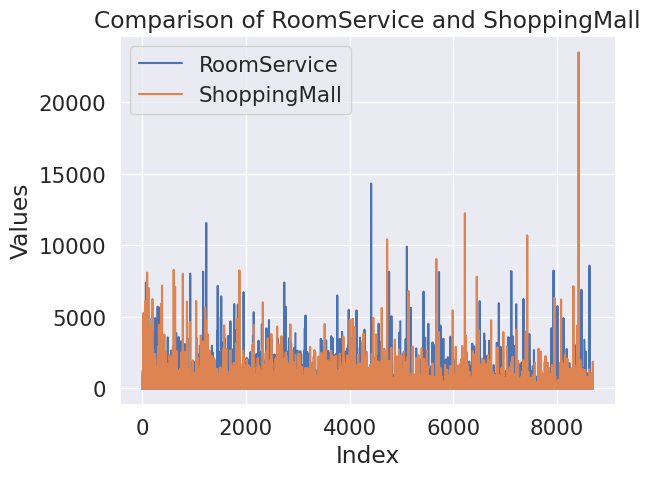

4277

In [5]:
# scatter_matrix(train_test, alpha=0.2, figsize=(6, 6), diagonal='kde')
# plt.show()
plt.plot(train_test['RoomService'], label='RoomService')
plt.plot(train_test['ShoppingMall'], label='ShoppingMall')
plt.title('Comparison of RoomService and ShoppingMall')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()
sum(train_test['Transported'].isna())

# 3.1.Handling Room Service Outliers

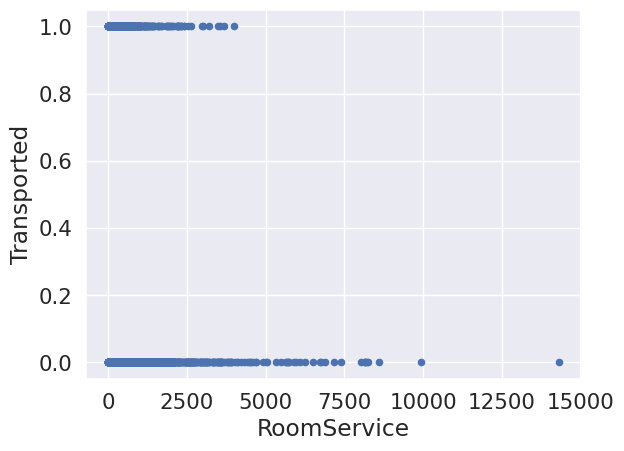

In [6]:
if 'Transported' in train_test.columns:
    train_test.plot.scatter(x='RoomService', y='Transported')
    plt.show()
else:
    print("'Transported' column does not exist in the DataFrame.")


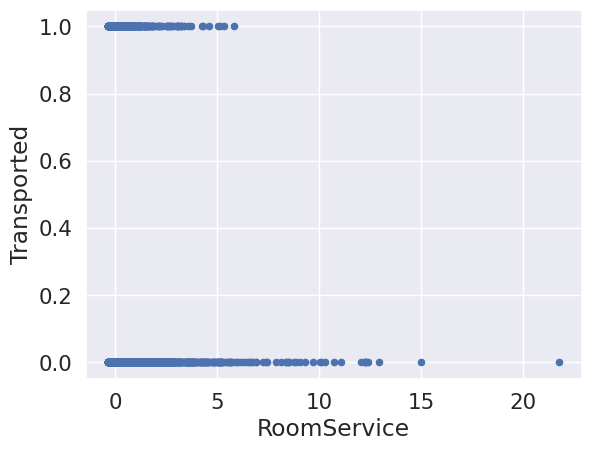

In [7]:
# scaled_value = (value - min) / (max - min)
scaler = StandardScaler()
# scaler = MinMaxScaler()
train_test['RoomService'] = scaler.fit_transform(train_test[['RoomService']])
train_test.plot.scatter(x='RoomService', y='Transported')
plt.show()

In [8]:
# # How to delete instances using panda
# # Q1 = df['RoomService'].quantile(0.25)
# # Q3 = df['RoomService'].quantile(0.75)
# # IQR = Q3 - Q1
# # df = df[~((df['RoomService'] < (Q1 - 1.5 * IQR)) |(df['RoomService'] > (Q3 + 1.5 * IQR)))]



# indexNames1 = train_test[ (train_test['RoomService'] > 6000)& (train_test['Transported'] == False)].index
# indexNames2 = train_test[ (train_test['RoomService'] > 2850) & (train_test['Transported'] == True)].index
# train_test.drop(indexNames1 , inplace=True)
# train_test.drop(indexNames2 , inplace=True)


# train_test.plot.scatter(x='RoomService', y='Transported')
# plt.show()
# #df.info()
# # print(len(indexNames))

# 3.1.Handling Food Court Outliers

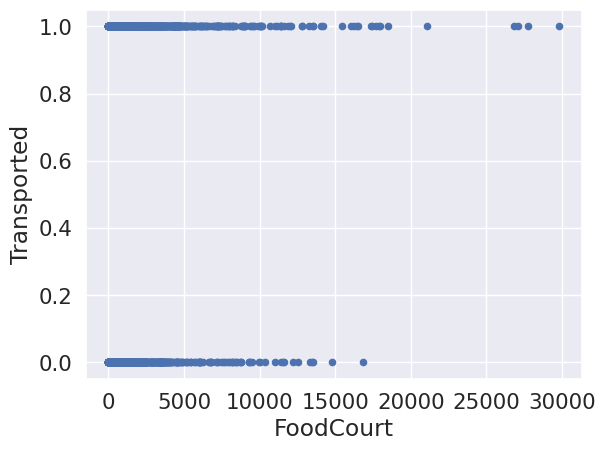

In [9]:
train_test.plot.scatter(x='FoodCourt', y='Transported')
plt.show()

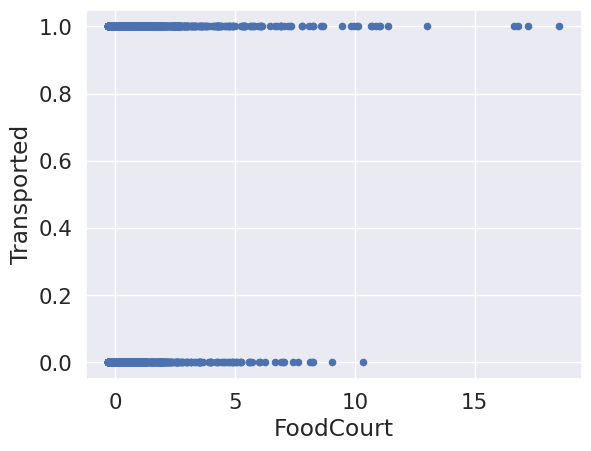

In [10]:
train_test['FoodCourt'] = scaler.fit_transform(train_test[['FoodCourt']])
train_test.plot.scatter(x='FoodCourt', y='Transported')
plt.show()

# 3.1.Handling ShoppingMall Outliers

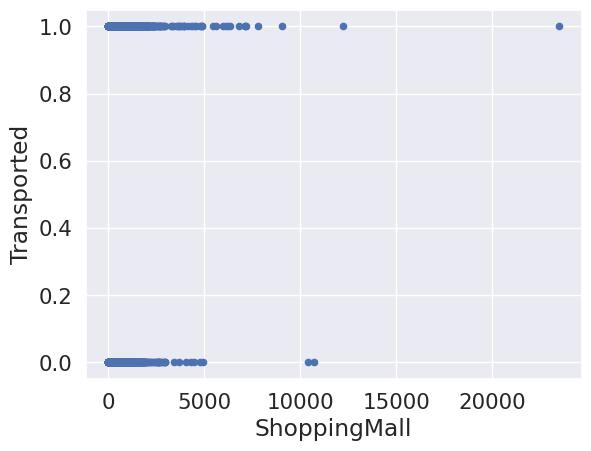

In [11]:
train_test.plot.scatter(x='ShoppingMall', y='Transported')
plt.show()

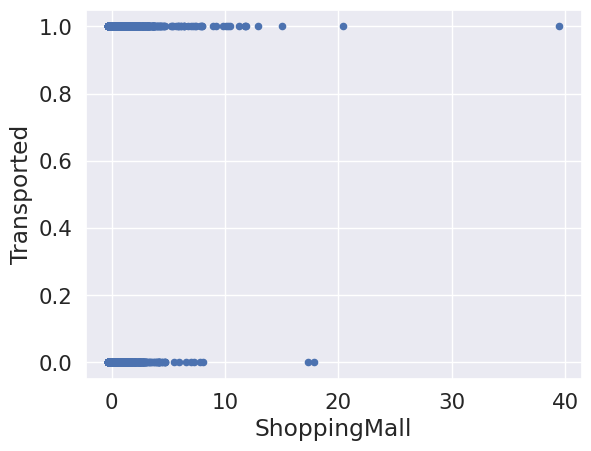

In [12]:
train_test['ShoppingMall'] = scaler.fit_transform(train_test[['ShoppingMall']])
train_test.plot.scatter(x='ShoppingMall', y='Transported')
plt.show()

# 3.1.Handling Spa Outliers

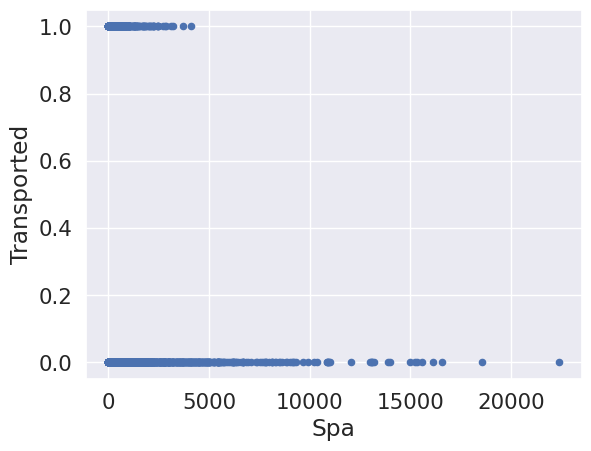

In [13]:
train_test.plot.scatter(x='Spa', y='Transported')
plt.show()

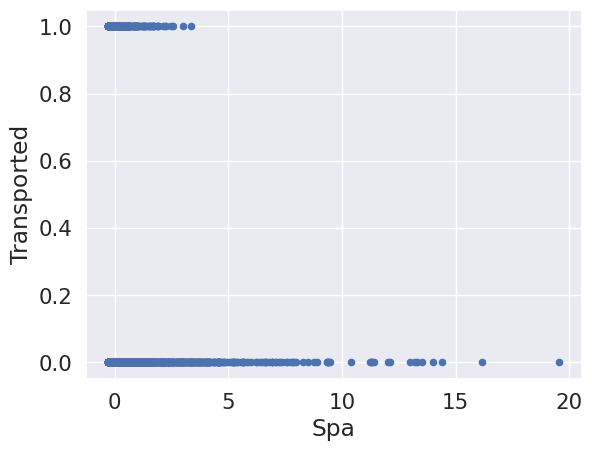

In [14]:
train_test['Spa'] = scaler.fit_transform(train_test[['Spa']])
train_test.plot.scatter(x='Spa', y='Transported')
plt.show()

# 3.1.Handling VRDeck Outliers

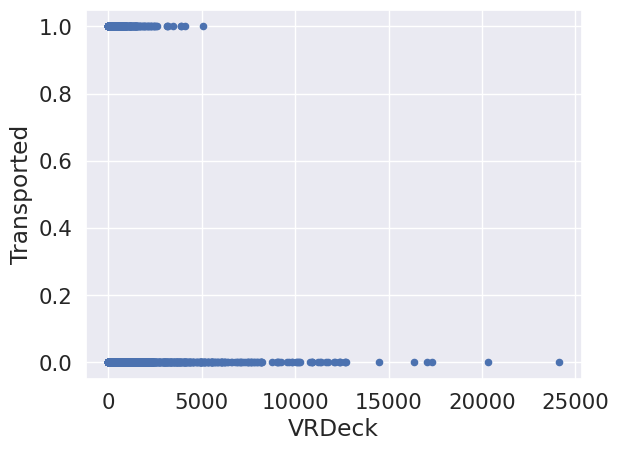

In [15]:
train_test.plot.scatter(x='VRDeck', y='Transported')
plt.show()

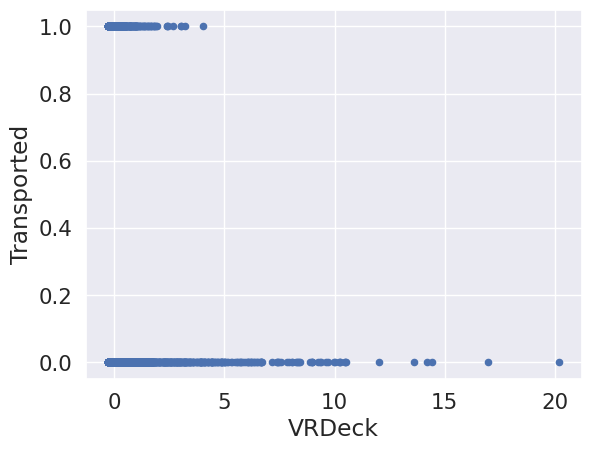

In [16]:
train_test['VRDeck'] = scaler.fit_transform(train_test[['VRDeck']])
train_test.plot.scatter(x='VRDeck', y='Transported')
plt.show()

In [17]:
# mean = train_test['VRDeck'].mean()
# std = train_test['VRDeck'].std()
# ZScore = (train_test['VRDeck'] - mean) / std

# threshold = 3
# outliers = train_test[np.abs(ZScore) > threshold]
# outliers

In [18]:
Expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#train_test.loc[(train_test['Age'] < 10) & (train_test[Expenses_columns].isnull()), Expenses_columns] = 0
# train_test.loc[(train_test['Age'] > 10) & train_test['RoomService'].isnull(), Expenses_columns] = train_test['RoomService'].mean()
# 


In [19]:
# First lets fill CryoSleep, based on totdal expenditure
train_test["Expenditure"]=train_test[Expenses_columns].sum(axis="columns")

train_test.loc[train_test["Expenditure"] == 0 & train_test['Age'].isna(), 'Age'] = 0


# filling expenditure with use of Age
def fill_with_mean(row):
    for col in Expenses_columns:
        if row['Age'] > 12 and pd.isnull(row[col]):
            row[col] = train_test[col].mean()
    return row

train_test = train_test.apply(fill_with_mean, axis=1)



def fill_with_zero(row):
    for col in Expenses_columns:
        if row['Age'] < 12 and pd.isnull(row[col]):
            row[col] = 0
    return row

# train_test = train_test.apply(fill_with_zero, axis=1)



train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12941 non-null  float64
 8   FoodCourt     12945 non-null  float64
 9   ShoppingMall  12937 non-null  float64
 10  Spa           12946 non-null  float64
 11  VRDeck        12927 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  Expenditure   12970 non-null  float64
dtypes: float64(7), object(8)
memory usage: 1.6+ MB


In [20]:
# Thanks to @Master Jiraiya

# Zero expenditure indicate that they are in CryoSleep
train_test['CryoSleep']=np.where(train_test['Expenditure']==0,1,0)

# Also, if they are VIPs, they probably would not choose to be in CryoSleep
train_test['VIP']=np.where(train_test['CryoSleep']==0,1,0)

train_test.drop(columns=["Expenditure"],inplace=True)

print(train_test.isna().sum())

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination      274
Age              270
VIP                0
RoomService       29
FoodCourt         25
ShoppingMall      33
Spa               24
VRDeck            43
Name             294
Transported     4277
dtype: int64


In [21]:
train_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,Maham Ofracculy,False
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,1,-0.175885,-0.279593,-0.253848,0.212808,-0.222693,Juanna Vines,True
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,-0.277804,1.971863,-0.296182,5.668310,-0.218456,Altark Susent,False
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,1,-0.344206,0.524543,0.332061,2.672473,-0.096428,Solam Susent,False
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,1,0.123696,-0.241091,-0.040482,0.226964,-0.258285,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,0,G/1496/S,TRAPPIST-1e,34.0,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,Jeron Peter,NaN
4273,9269_01,Earth,0,NaN,TRAPPIST-1e,42.0,1,-0.344206,0.249344,-0.267395,-0.264084,-0.137951,Matty Scheron,NaN
4274,9271_01,Mars,0,D/296/P,55 Cancri e,NaN,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,Jayrin Pore,NaN
4275,9273_01,Europa,0,D/297/P,NaN,NaN,1,-0.344206,1.406316,-0.296182,-0.272932,0.183221,Kitakan Conale,NaN


> HomePlanet: {'Earth', 'Europa', 'Mars', nan}
> {1,2,3,4}
> 
> #######################
> 
> Destination: {'55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', nan}
> {1,2,3,4}
> 
> 
> #######################
> 
> Cabin Class = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10}

In [22]:
#CryoSleep Train
train_test['CryoSleep'].replace({True: 1, False: 0}, inplace=True)

#Transported Train
train_test['Transported'] = train_test['Transported'].replace({True: 1, False: 0})

#HomePlanet Train
train_test['HomePlanet'].replace('Earth', 1, inplace=True)
train_test['HomePlanet'].replace('Europa', 2, inplace=True)
train_test['HomePlanet'].replace('Mars', 3, inplace=True)

#Destination Train
train_test['Destination'].replace('55 Cancri e', 1, inplace=True)
train_test['Destination'].replace('PSO J318.5-22', 2, inplace=True)
train_test['Destination'].replace('TRAPPIST-1e', 3, inplace=True)


#Vip Train
train_test['VIP'].replace({True: 1, False: 0}, inplace=True)


########################################################


# #CryoSleep Test
# test['CryoSleep'].replace({True: 1, False: 0}, inplace=True)

# #Transported Test
# # Don't have transported

# #HomePlanet Test
# test['HomePlanet'].replace('Earth', 1, inplace=True)
# test['HomePlanet'].replace('Europa', 2, inplace=True)
# test['HomePlanet'].replace('Mars', 3, inplace=True)

# #Destination Test
# test['Destination'].replace('55 Cancri e', 1, inplace=True)
# test['Destination'].replace('PSO J318.5-22', 2, inplace=True)
# test['Destination'].replace('TRAPPIST-1e', 3, inplace=True)

# #Vip Test
# test['VIP'].replace({True: 1, False: 0}, inplace=True)


train_test
# train_test.info()
# test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,2.0,0,B/0/P,3.0,39.0,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,Maham Ofracculy,0.0
1,0002_01,1.0,0,F/0/S,3.0,24.0,1,-0.175885,-0.279593,-0.253848,0.212808,-0.222693,Juanna Vines,1.0
2,0003_01,2.0,0,A/0/S,3.0,58.0,1,-0.277804,1.971863,-0.296182,5.668310,-0.218456,Altark Susent,0.0
3,0003_02,2.0,0,A/0/S,3.0,33.0,1,-0.344206,0.524543,0.332061,2.672473,-0.096428,Solam Susent,0.0
4,0004_01,1.0,0,F/1/S,3.0,16.0,1,0.123696,-0.241091,-0.040482,0.226964,-0.258285,Willy Santantines,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1.0,0,G/1496/S,3.0,34.0,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,Jeron Peter,NaN
4273,9269_01,1.0,0,NaN,3.0,42.0,1,-0.344206,0.249344,-0.267395,-0.264084,-0.137951,Matty Scheron,NaN
4274,9271_01,3.0,0,D/296/P,1.0,NaN,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,Jayrin Pore,NaN
4275,9273_01,2.0,0,D/297/P,NaN,NaN,1,-0.344206,1.406316,-0.296182,-0.272932,0.183221,Kitakan Conale,NaN


In [23]:
# expenses_grouped = train_test.groupby('Transported')[Expenses_columns].mean()

# plt.figure(figsize=(12, 6))
# expenses_grouped.plot(kind='bar')
# plt.xlabel('Transported')
# plt.ylabel('Average Expenses')
# plt.title('Average Expenses by Transported')
# plt.legend(Expenses_columns)
# plt.show()
sum(train_test["Age"].isna())

270

# 4. Filling NaN and Null cells

In [24]:
#Data For Train_Test
train_test["Name"].fillna("Unknown Unknown",inplace=True)
train_test["HomePlanet"].fillna(train_test["HomePlanet"].mode()[0],inplace=True)
train_test["Destination"].fillna(train_test["Destination"].mode()[0],inplace=True)
train_test["Cabin"].fillna(train_test["Cabin"].mode()[0],inplace=True)
train_test["Age"].fillna(int(train_test["Age"].mean()),inplace=True)
train_test["RoomService"].fillna(train_test["RoomService"].mean(),inplace=True)
train_test["FoodCourt"].fillna(train_test["FoodCourt"].mean(),inplace=True)
train_test["ShoppingMall"].fillna(train_test["ShoppingMall"].mean(),inplace=True)
train_test["Spa"].fillna(train_test["Spa"].mean(),inplace=True)
train_test["VRDeck"].fillna(train_test["VRDeck"].mean(),inplace=True)

# Define the bins and labels for AGE column
bins = [0, 15, 25, 35, 45, 60, 75, 90,120, 150]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Use pd.cut to scale the 'Age' column
train_test['Age'] = pd.cut(train_test['Age'], bins=bins, labels=labels, right=False)
# test['Age'] = pd.cut(test['Age'], bins=bins, labels=labels, right=False)




#No Nan, Null or empty cell
print(train_test.isna().sum())

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported     4277
dtype: int64


In [25]:
train_test[['Deck', 'Cabin', 'Port']] = train_test['Cabin'].str.split('/', expand=True)

# Train Data
#Port or Starboard of the cabins
train_test['Port'].replace('S', 0, inplace=True)
train_test['Port'].replace('P', 1, inplace=True)

#Class of the cabins
letter_to_int = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
train_test['Deck'] = train_test['Deck'].map(letter_to_int)


#####################################
#####################################
#####################################

# Test Data

# #Port or Starboard of the cabins
# test['Port'] = test['Cabin'].str.split('/').str[-1]
# test['Port'].replace('S', 0, inplace=True)
# test['Port'].replace('P', 1, inplace=True)

# #Class of the cabins
# test['Place'] = test['Cabin'].str.split('/').str[0]
# letter_to_int = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
# test['Place'] = test['Place'].map(letter_to_int)


# #Number of cabins
# test['Cabin'] = test['Cabin'].str.split('/').str[1]



train_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Port
0,0001_01,2.0,0,0,3.0,4,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,Maham Ofracculy,0.0,2,1
1,0002_01,1.0,0,0,3.0,2,1,-0.175885,-0.279593,-0.253848,0.212808,-0.222693,Juanna Vines,1.0,6,0
2,0003_01,2.0,0,0,3.0,5,1,-0.277804,1.971863,-0.296182,5.668310,-0.218456,Altark Susent,0.0,1,0


In [26]:
train_test['Group'] = train_test['PassengerId'].astype(str).str[:4]
counts = train_test['Group'].value_counts()
train_test['Group'] = train_test['Group'].map(counts)
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   12970 non-null  object  
 1   HomePlanet    12970 non-null  float64 
 2   CryoSleep     12970 non-null  int64   
 3   Cabin         12970 non-null  object  
 4   Destination   12970 non-null  float64 
 5   Age           12970 non-null  category
 6   VIP           12970 non-null  int64   
 7   RoomService   12970 non-null  float64 
 8   FoodCourt     12970 non-null  float64 
 9   ShoppingMall  12970 non-null  float64 
 10  Spa           12970 non-null  float64 
 11  VRDeck        12970 non-null  float64 
 12  Name          12970 non-null  object  
 13  Transported   8693 non-null   float64 
 14  Deck          12970 non-null  int64   
 15  Port          12970 non-null  int64   
 16  Group         12970 non-null  int64   
dtypes: category(1), float64(8), int64(5), object(3)
memory u

In [27]:
train_test[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'Port', 'Deck','Group']]= train_test[['HomePlanet', 'CryoSleep','Cabin', 'Destination', 'Age', 'VIP', 'Port', 'Deck','Group']].astype('Int64')
# train_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]= train_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].astype('Int64')
train_test[['Transported']]= train_test[['Transported']].astype('Int64')

train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  Int64  
 2   CryoSleep     12970 non-null  Int64  
 3   Cabin         12970 non-null  Int64  
 4   Destination   12970 non-null  Int64  
 5   Age           12970 non-null  Int64  
 6   VIP           12970 non-null  Int64  
 7   RoomService   12970 non-null  float64
 8   FoodCourt     12970 non-null  float64
 9   ShoppingMall  12970 non-null  float64
 10  Spa           12970 non-null  float64
 11  VRDeck        12970 non-null  float64
 12  Name          12970 non-null  object 
 13  Transported   8693 non-null   Int64  
 14  Deck          12970 non-null  Int64  
 15  Port          12970 non-null  Int64  
 16  Group         12970 non-null  Int64  
dtypes: Int64(10), float64(5), object(2)
memory usage: 1.9+ MB


In [28]:
##Apply square root transformation

## Train Data
# train_test['RoomService'] = train_test['RoomService']**0.5
# train_test['FoodCourt'] = train_test['FoodCourt']**0.5
# train_test['ShoppingMall'] = train_test['ShoppingMall']**0.5
# train_test['Spa'] = train_test['Spa']**0.5
# train_test['VRDeck'] = train_test['VRDeck']**0.5


# ## Test Data
# test['RoomService'] = test['RoomService']**0.5
# test['FoodCourt'] = test['FoodCourt']**0.5
# test['ShoppingMall'] = test['ShoppingMall']**0.5
# test['Spa'] = test['Spa']**0.5
# test['VRDeck'] = test['VRDeck']**0.5

# train_test.head(3)
print(train_test.isna().sum())

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin              0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name               0
Transported     4277
Deck               0
Port               0
Group              0
dtype: int64


In [29]:
# ## Apply log transformation

# ## Train Data
# train['RoomService'] = np.log1p(train['RoomService'])
# train['FoodCourt'] = np.log1p(train['FoodCourt'])
# train['ShoppingMall'] = np.log1p(train['ShoppingMall'])
# train['Spa'] = np.log1p(train['Spa'])
# train['VRDeck'] = np.log1p(train['VRDeck'])


# ## Test Data
# test['RoomService'] = np.log1p(test['RoomService'])
# test['FoodCourt'] = np.log1p(test['FoodCourt'])
# test['ShoppingMall'] = np.log1p(test['ShoppingMall'])
# test['Spa'] = np.log1p(test['Spa'])
# test['VRDeck'] = np.log1p(test['VRDeck'])
# train.head(3)

<Axes: >

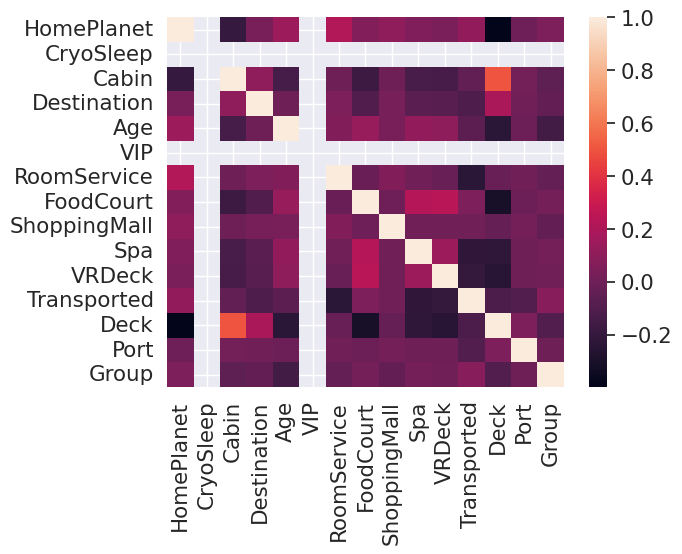

In [30]:
train_num = train_test.select_dtypes(include=['float64', 'int64'])

# Calculate the correlations of numerical columns
corr = train_num.corr()

sns.heatmap(corr, annot=False)

In [31]:
#print('cryo Taransported: ', sum(df[df.CryoSleep == 1].Transported), 'transported: ',sum(df.Transported))
# # Calculate mean
# df['Mean_luxury'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].mean(axis=1)

# df = df.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

# df['BigSpender'] = np.where(df.Mean_luxury > 1000, 1,0)
# df['Mid_Spender'] = np.where(df.Mean_luxury >= 500, 1,0)
# df['Non_Spender'] = np.where(df.Mean_luxury == 0, 1,0)
# df.head(3)

{1:'55 Cancri e', 2:'PSO J318.5-22', 3:'TRAPPIST-1e'}
{1:'Earth', 2:'Europa', 3:'Mars'}
<<<<<HomePlanet to Destination>>>>
1 to 1 >>> 721
1 to 2 >>> 728
1 to 3 >>> 3354
--------------    
2 to 1 >>> 193
2 to 2 >>> 49
2 to 3 >>> 1517
-------------- 
3 to 1 >>> 886
3 to 2 >>> 19
3 to 3 >>> 1226
-------------- 

In [32]:
train = train_test[train_test['Transported'].notnull()].copy()
train.Transported =train.Transported.astype('Int64')
test = train_test[train_test['Transported'].isnull()].drop("Transported",axis=1)
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0 to 4276
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4277 non-null   Int64  
 2   CryoSleep     4277 non-null   Int64  
 3   Cabin         4277 non-null   Int64  
 4   Destination   4277 non-null   Int64  
 5   Age           4277 non-null   Int64  
 6   VIP           4277 non-null   Int64  
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4277 non-null   object 
 13  Deck          4277 non-null   Int64  
 14  Port          4277 non-null   Int64  
 15  Group         4277 non-null   Int64  
dtypes: Int64(9), float64(5), object(2)
memory usage: 605.6+ KB


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   Int64  
 2   CryoSleep     8693 non-null   Int64  
 3   Cabin         8693 non-null   Int64  
 4   Destination   8693 non-null   Int64  
 5   Age           8693 non-null   Int64  
 6   VIP           8693 non-null   Int64  
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   Int64  
 14  Deck          8693 non-null   Int64  
 15  Port          8693 non-null   Int64  
 16  Group         8693 non-null   Int64  
dtypes: Int64(10), float64(5), object(2)
memory usage: 1.3+ MB


In [34]:
### Train Data
newTrain = train
train_ids = newTrain['PassengerId'].copy()
train_trs = newTrain['Transported'].copy()
newTrain.drop(columns=['PassengerId','Name','Transported'],inplace=True)


#####################


### Test Data
newTest = test
test_ids = newTest['PassengerId'].copy()
newTest.drop(columns=['PassengerId','Name'],inplace=True)


newTrain.head(3)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Port,Group
0,2,0,0,3,4,1,-0.344206,-0.285274,-0.296182,-0.272932,-0.259980,2,1,1
1,1,0,0,3,2,1,-0.175885,-0.279593,-0.253848,0.212808,-0.222693,6,0,1
2,2,0,0,3,5,1,-0.277804,1.971863,-0.296182,5.668310,-0.218456,1,0,2


In [35]:
newTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   Int64  
 1   CryoSleep     8693 non-null   Int64  
 2   Cabin         8693 non-null   Int64  
 3   Destination   8693 non-null   Int64  
 4   Age           8693 non-null   Int64  
 5   VIP           8693 non-null   Int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Deck          8693 non-null   Int64  
 12  Port          8693 non-null   Int64  
 13  Group         8693 non-null   Int64  
dtypes: Int64(9), float64(5)
memory usage: 1.1 MB


In [36]:
newTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4277 non-null   Int64  
 1   CryoSleep     4277 non-null   Int64  
 2   Cabin         4277 non-null   Int64  
 3   Destination   4277 non-null   Int64  
 4   Age           4277 non-null   Int64  
 5   VIP           4277 non-null   Int64  
 6   RoomService   4277 non-null   float64
 7   FoodCourt     4277 non-null   float64
 8   ShoppingMall  4277 non-null   float64
 9   Spa           4277 non-null   float64
 10  VRDeck        4277 non-null   float64
 11  Deck          4277 non-null   Int64  
 12  Port          4277 non-null   Int64  
 13  Group         4277 non-null   Int64  
dtypes: Int64(9), float64(5)
memory usage: 538.8 KB


In [37]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(newtrainDF.drop('Transported',axis=1), 
#                                                   df['Transported'], test_size=0.30, 
#                                                     random_state=101)
# newtrainDF.head(1)

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(newTrain, train_trs)

LogisticRegression(max_iter=10000)

In [39]:
# df_test['stSpenders'] = df_test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].std(axis=1)
# df_test = df_test.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])
# df_test.head()

In [40]:
 predictions = logmodel.predict(newTest)

In [41]:
df_predictions = pd.DataFrame()
df_predictions['PassengerId'] = pd.Series(test_ids.T.values)
df_predictions['Transported'] = pd.Series(predictions)
df_predictions.Transported = np.where(df_predictions.Transported==1,True,False)
df_predictions.to_csv("20thAttempt.csv", sep=',', index=False)
df_predictions.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In this report, the 'Precision' column tells us the proportion of positive identifications (i.e., the passenger was transported) that were actually correct. The 'Recall' column tells us the proportion of actual positives that were identified correctly. The 'F1-score' is a function of Precision and Recall and gives a balanced measure of the model's performance.

Remember, this is a basic model. Depending on the performance of the model, you might need to consider more advanced techniques such as handling class imbalance, feature engineering, or using a more complex model.